In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Scaling
from sklearn.preprocessing import RobustScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/!Test | Classify Game Rating & Explain/Video_Games_ESRB_Rating.csv")
df.head(20)

,title,games_price,play_times_(hr),year,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,12.30,290,2011,1,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,E
1,Subnautica: Below Zero,9.93,69,2017,1,No,Yes,No,No,No,...,No,No,No,No,No,No,No,No,No,ET
2,NIER REPLICANT VER.Yes.22474487Yes39…,8.68,342,2000,1,No,No,Yes,No,No,...,No,No,No,Yes,No,Yes,No,No,No,M
3,Jamestown+,4.34,163,1999,0,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,ET
4,Neptunia Virtual Stars,5.20,216,2007,0,No,No,No,No,No,...,No,No,No,No,No,Yes,No,No,No,RP
5,Monster Energy Supercross - The Official Video...,7.26,36,2009,1,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,E
6,Monochrome Order,9.78,267,2004,0,No,No,Yes,No,No,...,No,No,No,No,No,No,No,No,Yes,T
7,Blightbound,10.21,80,2005,1,No,No,No,Yes,No,...,Yes,No,No,No,No,No,No,No,No,T
8,Maquette,3.89,60,2007,0,Yes,No,No,No,No,...,No,No,No,No,No,No,No,No,No,ET
9,FATAL FURY™ BATTLE ARCHIVES VOL.2,10.12,228,2006,0,No,NaN,No,No,No,...,No,No,No,No,No,Yes,No,No,No,T


In [ ]:
df.isnull().sum()

title                       0
games_price                 0
play_times_(hr)             0
year                        0
console                     0
alcohol_reference           1
animated_blood              2
blood                       2
blood_and_gore              2
cartoon_violence            0
crude_humor                 1
drug_reference              1
fantasy_violence            1
intense_violence            0
language                    1
lyrics                      1
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       2
mild_language               2
mild_lyrics                 3
mild_suggestive_themes      4
mild_violence               0
no_descriptors              2
nudity                      1
partial_nudity              0
sexual_content              2
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alc

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

title                       0
games_price                 0
play_times_(hr)             0
year                        0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alc

In [ ]:
df = df.reset_index(drop=1)

In [ ]:
gen = list(df.columns[5 : -1])
gen

['alcohol_reference',
 'animated_blood',
 'blood',
 'blood_and_gore',
 'cartoon_violence',
 'crude_humor',
 'drug_reference',
 'fantasy_violence',
 'intense_violence',
 'language',
 'lyrics',
 'mature_humor',
 'mild_blood',
 'mild_cartoon_violence',
 'mild_fantasy_violence',
 'mild_language',
 'mild_lyrics',
 'mild_suggestive_themes',
 'mild_violence',
 'no_descriptors',
 'nudity',
 'partial_nudity',
 'sexual_content',
 'sexual_themes',
 'simulated_gambling',
 'strong_janguage',
 'strong_sexual_content',
 'suggestive_themes',
 'use_of_alcohol',
 'use_of_drugs_and_alcohol',
 'violence']

In [ ]:
for i in gen:
  col = []
  for j in range(df.shape[0]):
    if df[i][j] == "Yes":
      col.append(1)
    else:
      col.append(0)
  df[i] = np.array(col)
df

,title,games_price,play_times_(hr),year,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,12.30,290,2011,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,9.93,69,2017,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.Yes.22474487Yes39…,8.68,342,2000,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,4.34,163,1999,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,5.20,216,2007,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,RP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,SENRAN KAGURA Peach Beach Splash,4.29,105,2005,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,M
1867,Sneaky Bears,3.83,114,2020,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T
1868,SPARC,8.39,285,2013,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1869,Still Time,4.26,350,2013,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,T


In [ ]:
df = df.loc[:, 'alcohol_reference':'esrb_rating']
df

,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,ET
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,RP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,0,0,0,0,0,0,0,1,0,0,...,1,1,0,1,0,0,0,0,0,M
1867,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,T
1868,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1869,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T


In [ ]:
from sklearn.model_selection import train_test_split

train, test, train_Y, test_Y = train_test_split(df.iloc[:,:-1], df['esrb_rating'], 
                                                test_size=0.2, random_state=28)

In [ ]:
train

,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
1436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1040,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
218,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1704,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1056,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1541,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
test

,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
971,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1260,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1123,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
917,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1409,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
982,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1433,0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
train_Y

1436    ET
1040    ET
218     ET
1484     E
1704     M
        ..
1283     T
1056    ET
1302     T
1541    RP
1281    ET
Name: esrb_rating, Length: 1496, dtype: object

In [ ]:
test_Y

971      T
51       E
1260    ET
1123     T
917      T
        ..
1718     T
1409     T
982     ET
1433     M
770      T
Name: esrb_rating, Length: 375, dtype: object

In [ ]:
category, train_Y = np.unique(train_Y, return_inverse=True)

In [ ]:
category

array(['E', 'ET', 'M', 'RP', 'T'], dtype=object)

In [ ]:
train_Y

array([1, 1, 1, ..., 4, 3, 1])

E=0, ET=1, M=2, RP=3, T=4

In [ ]:
category, test_Y = np.unique(test_Y, return_inverse=True)

In [ ]:
test_Y

array([4, 0, 1, 4, 4, 4, 1, 1, 2, 0, 1, 1, 4, 0, 1, 2, 0, 1, 1, 2, 4, 1,
       0, 4, 4, 0, 0, 0, 4, 4, 0, 0, 0, 1, 3, 1, 4, 4, 0, 0, 1, 2, 4, 4,
       1, 1, 1, 4, 2, 4, 1, 4, 1, 1, 1, 4, 0, 4, 1, 0, 4, 4, 0, 1, 2, 0,
       4, 4, 1, 4, 1, 1, 4, 0, 1, 4, 1, 0, 0, 4, 2, 2, 0, 0, 2, 0, 2, 4,
       4, 4, 1, 4, 0, 4, 3, 1, 2, 3, 4, 0, 1, 4, 4, 0, 4, 4, 0, 4, 2, 0,
       0, 1, 4, 2, 1, 4, 2, 1, 0, 4, 0, 4, 0, 0, 2, 1, 0, 2, 1, 4, 4, 4,
       4, 1, 0, 4, 2, 2, 1, 0, 2, 1, 2, 4, 2, 0, 4, 1, 4, 3, 1, 2, 2, 4,
       0, 1, 4, 2, 0, 4, 1, 4, 2, 0, 2, 2, 0, 4, 0, 1, 4, 4, 1, 4, 0, 1,
       1, 2, 2, 3, 1, 0, 2, 0, 4, 0, 4, 4, 1, 2, 4, 2, 4, 2, 1, 2, 2, 1,
       4, 2, 0, 4, 4, 4, 4, 0, 4, 0, 2, 4, 4, 4, 4, 0, 4, 0, 4, 1, 1, 4,
       2, 4, 1, 4, 3, 4, 1, 0, 2, 0, 4, 4, 2, 4, 0, 0, 4, 1, 1, 4, 1, 0,
       2, 0, 2, 0, 2, 2, 1, 1, 2, 4, 0, 2, 4, 1, 0, 1, 0, 1, 0, 0, 4, 0,
       1, 3, 2, 1, 2, 4, 4, 0, 0, 4, 4, 0, 4, 2, 4, 0, 4, 1, 0, 1, 4, 2,
       0, 2, 1, 4, 1, 1, 1, 1, 2, 2, 4, 4, 2, 2, 1,

# decision tree

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = tree.DecisionTreeClassifier()
model_1 = clf.fit(train, train_Y)

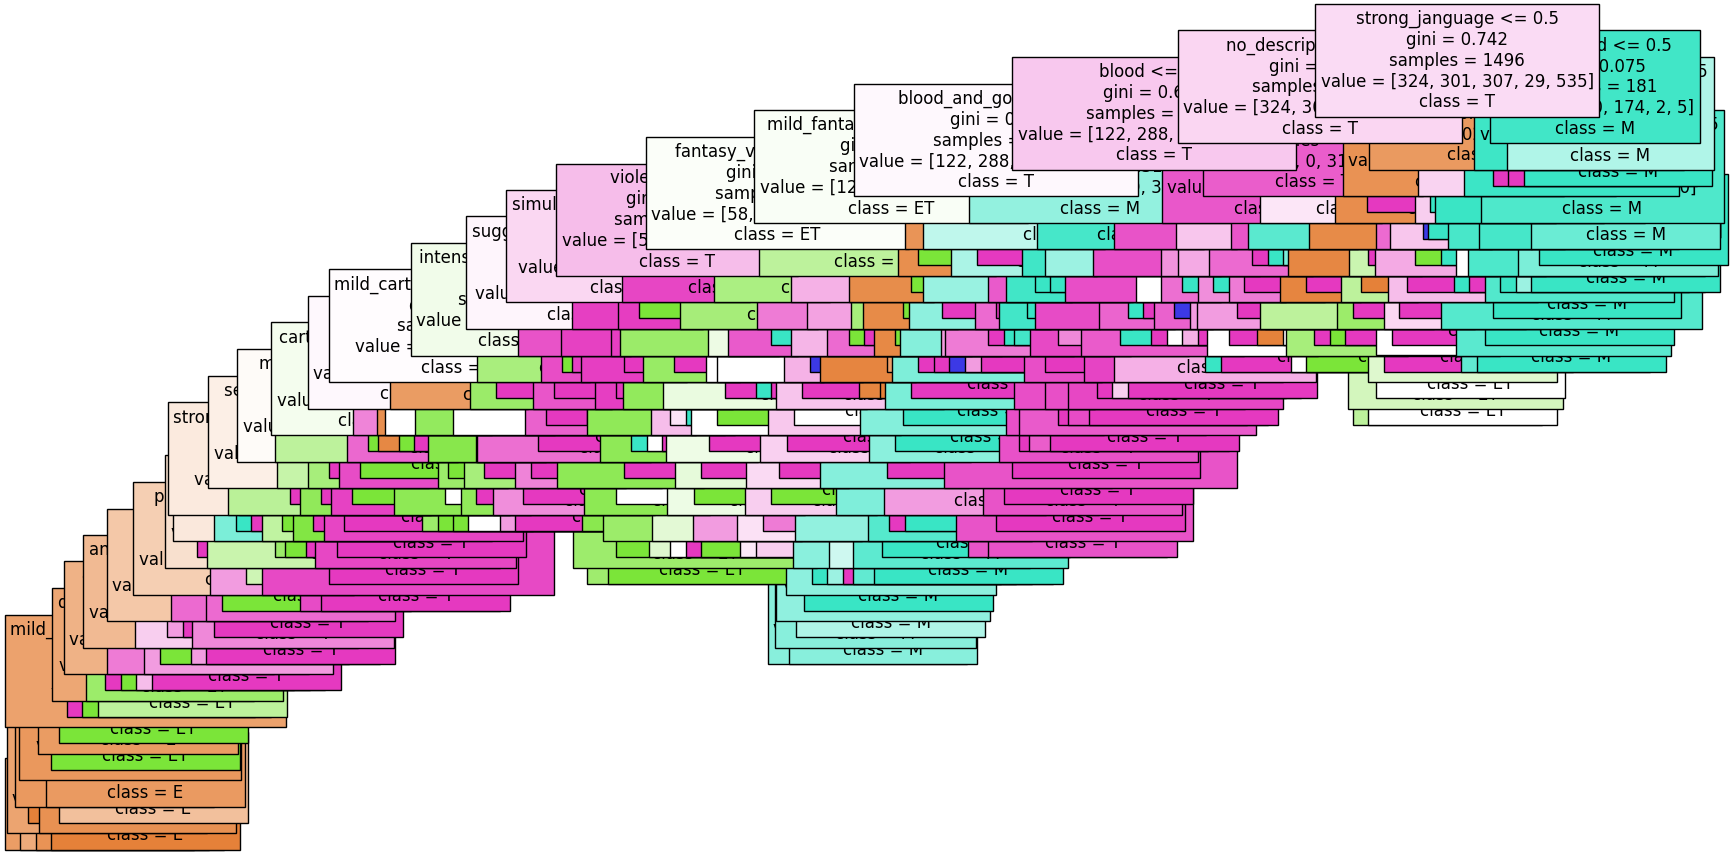

In [ ]:
plt.figure(figsize=(20,10))
# tree.plot_tree(model)
plot_tree(model_1, filled=True, feature_names=train.columns, class_names=category, fontsize=12)
plt.show()

In [ ]:
model_1.predict(test)

array([4, 0, 1, 4, 1, 4, 1, 1, 2, 0, 2, 1, 4, 0, 1, 2, 0, 1, 1, 2, 4, 1,
       0, 4, 4, 0, 0, 0, 4, 4, 0, 0, 0, 1, 4, 1, 4, 4, 0, 0, 1, 2, 4, 2,
       1, 1, 1, 4, 2, 4, 1, 4, 1, 1, 1, 4, 0, 1, 1, 0, 1, 4, 0, 1, 2, 0,
       4, 4, 1, 4, 1, 0, 4, 1, 1, 4, 1, 0, 0, 4, 2, 2, 0, 0, 2, 0, 2, 4,
       4, 4, 1, 4, 0, 4, 1, 1, 2, 1, 1, 0, 4, 4, 1, 0, 4, 0, 0, 4, 2, 0,
       0, 1, 4, 2, 1, 4, 2, 1, 0, 4, 0, 0, 0, 0, 2, 1, 0, 2, 1, 4, 4, 4,
       4, 4, 0, 4, 2, 2, 4, 0, 2, 1, 2, 4, 2, 0, 4, 4, 4, 4, 1, 2, 2, 4,
       0, 1, 4, 2, 0, 4, 1, 2, 2, 0, 2, 2, 0, 4, 0, 1, 4, 4, 1, 4, 0, 1,
       1, 2, 2, 4, 1, 0, 4, 0, 4, 0, 4, 4, 1, 2, 2, 2, 4, 2, 1, 2, 2, 1,
       4, 2, 0, 4, 4, 0, 4, 0, 4, 0, 2, 4, 0, 4, 4, 0, 4, 0, 4, 1, 4, 1,
       2, 4, 1, 4, 4, 4, 1, 0, 4, 0, 4, 4, 2, 3, 0, 0, 4, 1, 1, 4, 1, 0,
       2, 0, 2, 0, 2, 2, 1, 4, 4, 3, 0, 2, 4, 1, 0, 1, 0, 1, 0, 0, 4, 0,
       1, 2, 2, 1, 2, 4, 4, 0, 0, 4, 4, 0, 4, 4, 4, 0, 4, 1, 0, 1, 4, 2,
       0, 2, 1, 4, 1, 4, 1, 4, 2, 2, 4, 4, 2, 4, 1,

In [ ]:
model_1.predict(test) == test_Y

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
        True, False,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,

## Accuracy score

In [ ]:
giga = np.sum(model_1.predict(test) == test_Y)
print("The test accuracy score is", (giga / len(test_Y)))

The test accuracy score is 0.8613333333333333


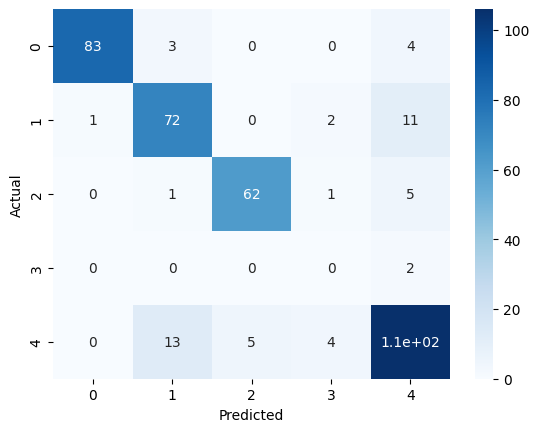

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(model_1.predict(test), test_Y), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Support Vector Machines

In [ ]:
from sklearn import svm
clf = svm.SVC()
model_2 = clf.fit(train, train_Y)

In [ ]:
model_2.predict(test)

array([4, 0, 1, 4, 1, 4, 1, 1, 2, 0, 1, 1, 4, 0, 1, 2, 0, 1, 1, 2, 4, 1,
       0, 4, 4, 0, 0, 0, 4, 4, 0, 0, 0, 1, 4, 1, 4, 4, 0, 0, 1, 2, 4, 4,
       1, 1, 1, 4, 2, 4, 1, 4, 1, 1, 1, 4, 0, 4, 1, 0, 1, 4, 0, 1, 2, 0,
       4, 4, 1, 4, 1, 0, 4, 1, 1, 4, 1, 0, 0, 4, 2, 2, 0, 0, 2, 0, 2, 4,
       4, 4, 1, 4, 0, 4, 1, 1, 2, 1, 1, 0, 4, 4, 1, 0, 4, 2, 0, 4, 2, 0,
       0, 1, 4, 4, 1, 4, 2, 1, 0, 4, 0, 0, 0, 0, 2, 1, 0, 2, 1, 4, 4, 4,
       4, 4, 0, 4, 2, 2, 4, 0, 2, 1, 2, 4, 2, 0, 4, 4, 4, 4, 1, 2, 2, 4,
       0, 1, 4, 2, 0, 4, 1, 2, 2, 0, 2, 2, 0, 4, 0, 1, 4, 4, 1, 4, 0, 1,
       1, 2, 2, 4, 1, 0, 4, 0, 4, 0, 4, 4, 1, 2, 2, 2, 4, 2, 1, 2, 2, 1,
       4, 2, 0, 4, 4, 4, 4, 0, 4, 0, 2, 4, 4, 4, 4, 0, 4, 0, 4, 1, 4, 1,
       2, 4, 1, 4, 4, 4, 1, 0, 4, 0, 4, 4, 2, 4, 0, 0, 4, 4, 1, 4, 1, 0,
       2, 0, 2, 0, 2, 2, 1, 4, 4, 4, 0, 2, 4, 1, 0, 1, 0, 1, 0, 0, 4, 0,
       1, 2, 2, 1, 2, 4, 4, 0, 0, 4, 4, 0, 4, 4, 4, 0, 4, 1, 0, 1, 4, 2,
       0, 2, 1, 4, 1, 4, 1, 4, 2, 2, 4, 4, 2, 4, 1,

In [ ]:
model_2.predict(test) == test_Y

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
        True, False,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,

## Accuracy score

In [ ]:
giga = np.sum(model_2.predict(test) == test_Y)
print("The test accuracy score is", (giga / len(test_Y)))

The test accuracy score is 0.8826666666666667


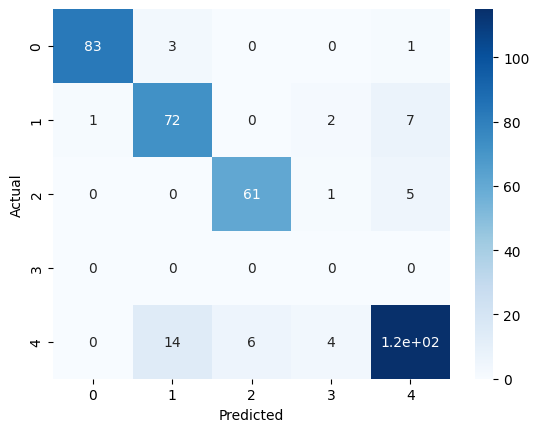

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(model_2.predict(test), test_Y), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
rat_tes = pd.read_csv("/content/drive/MyDrive/!Test | Classify Game Rating & Explain/Video_Games_ESRB_Rating_Test.csv")
rat_tes.head(10)

,title,games_price,play_times_(hr),year,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
0,Still Time,12.63,9,2008,0,No,No,Yes,No,No,...,No,No,No,No,No,No,No,No,No,Yes
1,Surf World Series,3.44,134,1999,1,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,The Metronomicon: Slay the Dance Floor,12.26,326,2014,1,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
3,Windjammers,4.76,259,1996,0,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Rock of Ages 2: Bigger and Boulder,5.03,24,2004,0,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
5,South Park: The Fractured but Whole,12.94,129,2015,1,No,No,No,Yes,No,...,No,Yes,No,No,Yes,No,No,No,No,No
6,Dishonored: Death of the Outsider,9.66,263,2011,1,No,No,No,Yes,No,...,No,No,No,No,No,No,Yes,No,No,No
7,Battle of the Bulge,6.28,236,2011,1,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
8,F1 2017,12.53,189,2011,1,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
9,NARUTO SHIPPUDEN™: Ultimate Ninja® STORM 2,6.55,258,2016,1,No,No,No,No,Yes,...,No,No,No,No,No,No,No,No,No,No


In [ ]:
tmp = rat_tes.copy()
tmp = tmp.drop(['title', 'year', 'console', 'games_price', 'play_times_(hr)'],axis=1)
tmp

,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
0,No,No,Yes,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,Yes
1,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,No,No,No,Yes,No,No,No,Yes,No,No,...,No,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,No,No,No,No,No,Yes,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,No,No,No,Yes,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
496,No,No,Yes,No,No,No,No,No,No,No,...,Yes,No,No,No,No,No,No,No,No,No
497,No,No,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,Yes,No,No,Yes,No,No
498,No,No,No,No,No,No,No,Yes,No,No,...,No,No,No,No,No,No,No,No,No,No


In [ ]:
for i in gen:
  o_l, tmp[i] = np.unique(tmp[i], return_inverse=True)
tmp

,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
496,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
497,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
498,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
o_l

array(['No', 'Yes'], dtype=object)

No = 0
,Yes = 1

In [ ]:
# scaler = RobustScaler()
# tmp[['games_price', 'play_times_(hr)']] = scaler.fit_transform(tmp[['games_price', 'play_times_(hr)']])
# tmp

# เลือกใช้modelที่2

In [ ]:
rat_tes["predict"] = category[model_2.predict(tmp)]

In [ ]:
rat_tes.head(15)

,title,games_price,play_times_(hr),year,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,predict
0,Still Time,12.63,9,2008,0,No,No,Yes,No,No,...,No,No,No,No,No,No,No,No,Yes,T
1,Surf World Series,3.44,134,1999,1,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,E
2,The Metronomicon: Slay the Dance Floor,12.26,326,2014,1,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,M
3,Windjammers,4.76,259,1996,0,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,E
4,Rock of Ages 2: Bigger and Boulder,5.03,24,2004,0,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,ET
5,South Park: The Fractured but Whole,12.94,129,2015,1,No,No,No,Yes,No,...,Yes,No,No,Yes,No,No,No,No,No,M
6,Dishonored: Death of the Outsider,9.66,263,2011,1,No,No,No,Yes,No,...,No,No,No,No,No,Yes,No,No,No,M
7,Battle of the Bulge,6.28,236,2011,1,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,ET
8,F1 2017,12.53,189,2011,1,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,E
9,NARUTO SHIPPUDEN™: Ultimate Ninja® STORM 2,6.55,258,2016,1,No,No,No,No,Yes,...,No,No,No,No,No,No,No,No,No,T


In [ ]:
rat_tes.to_csv('/content/drive/MyDrive/it19_data/last_HW.csv')